In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tải và chuẩn bị dữ liệu MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu (normalize)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Tăng cường dữ liệu cho tập huấn luyện
datagen = ImageDataGenerator(
    rotation_range=10,       # Xoay ảnh ngẫu nhiên
    width_shift_range=0.1,   # Dịch chuyển ảnh theo chiều ngang
    height_shift_range=0.1,  # Dịch chuyển ảnh theo chiều dọc
    shear_range=0.1,         # Biến dạng ảnh
    zoom_range=0.1,          # Phóng to thu nhỏ ảnh
    horizontal_flip=True,    # Lật ảnh ngang
    fill_mode='nearest'      # Phương thức điền các pixel bị thiếu
)

# Fit dữ liệu tăng cường vào dữ liệu huấn luyện
datagen.fit(train_images)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.5),  # Thêm lớp Dropout để tránh overfitting
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callback để lưu mô hình có độ chính xác tốt nhất
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True) # Thay đổi phần mở rộng thành .keras


In [ ]:
from sklearn.metrics import classification_report

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Độ chính xác: {test_acc}")

# Dự đoán và in báo cáo phân loại
predictions = model.predict(test_images)
predicted_classes = predictions.argmax(axis=1)

print("Báo cáo phân loại:")
print(classification_report(test_labels, predicted_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1042 - loss: 2.3060
Độ chính xác: 0.09480000287294388
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       980
           1       0.01      0.03      0.01      1135
           2       0.00      0.00      0.00      1032
           3       0.25      0.75      0.37      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.01      0.00      0.00       958
           7       0.97      0.14      0.25      1028
           8       0.00      0.00      0.00       974
           9       0.01      0.01      0.01      1009

    accuracy                           0.09     10000
   macro avg       0.13      0.09      0.06     10000
weighted avg       0.13      0.09      0.07     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


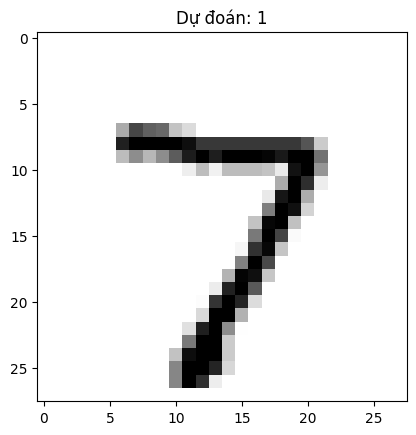

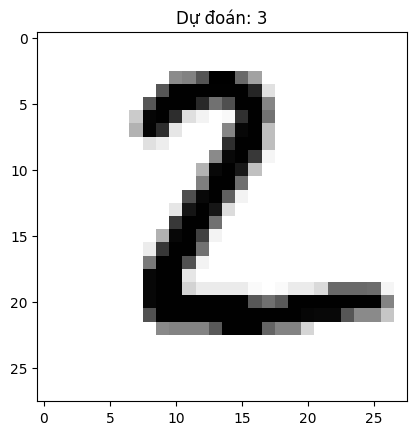

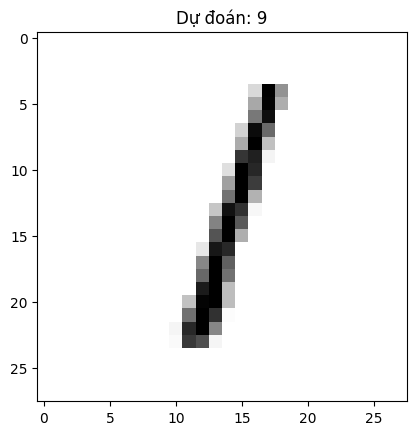

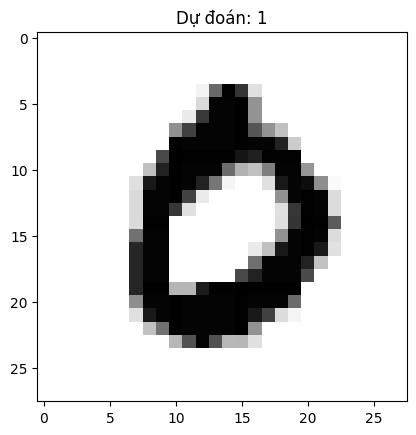

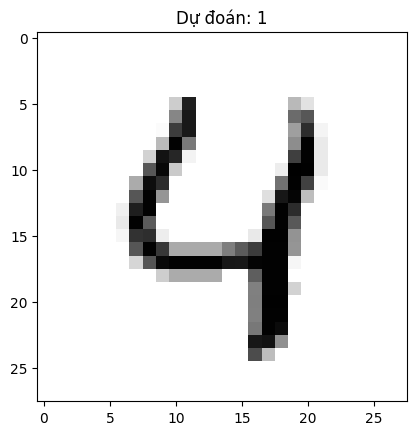

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị 5 ảnh đầu tiên và kết quả dự đoán
for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Dự đoán: {predictions[i].argmax()}")
    plt.show()
